## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import calendar
from datetime import datetime

# Scikit-learn algorithms and functions
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor

# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

# Display Matplotlib output inline
%matplotlib inline

# Additional configuration
np.set_printoptions(precision=2)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Pharma Sales/salesdaily.csv') 

In [5]:
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


## On which day of the week is the second drug (M01AE) most often sold?

In [6]:
df = df[['M01AE', 'Weekday Name']]
result = df.groupby(['Weekday Name'], as_index=False).sum().sort_values('M01AE', ascending=False)

In [10]:
result

,Weekday Name,M01AE
3,Sunday,1384.939667
2,Saturday,1311.554917
1,Monday,1118.503000
0,Friday,1117.781083
6,Wednesday,1110.250000
4,Thursday,1092.282396
5,Tuesday,1069.307583


In [7]:
resultDay = result.iloc[0,0]
resultValue = round(result.iloc[0,1], 2)

In [8]:
print('The second drug, M01AE, was most often sold on ' + str(resultDay))
print('with the volume of ' + str(resultValue))

The second drug, M01AE, was most often sold on Sunday
with the volume of 1384.94


## Which drug has sold most often on Mondays in 2017?

In [20]:
df_daily = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Pharma Sales/salesdaily.csv') 

In [21]:
df_daily = df_daily.loc[df_daily['datum'].str.contains('2017', flags=re.I, regex=True) & (df_daily['Weekday Name'] == 'Monday')]

In [22]:
df_daily = df_daily.groupby(['Weekday Name'], as_index=False).sum()

In [23]:
df_daily = df_daily[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
result = df_daily.sort_values(by=0, ascending=False, axis=1)

In [24]:
for field in result.columns.values[0:1]:
    print('The drug most often sold on Mondays in 2017 is ' + str(field))
    print('with the volume of ' + str(round(result[field].iloc[0], 2)))

The drug most often sold on Mondays in 2017 is N02BE
with the volume of 1160.56


## Which three drugs have the highest sales in Jan 2015, Jul 2016, Sep 2017?

In [11]:
df_month = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Pharma Sales/salesmonthly.csv') 

In [12]:
df_month.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


In [17]:
def top3byMonth(month, year):
    """
    given a month and a year
    find top 3 drugs sold
    """
    month = str(month) if (month > 9) else '0' + str(month)
    year = str(year)
    # filter by date
    sales = df_month.loc[df_month['datum'].str.contains('^'+year+'\-'+month+'', flags=re.I, regex=True)]
    # reset index
    sales = sales.reset_index()
    # filter relevant columns
    topSales = sales[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
    # sort values horizontally
    topSales = topSales.sort_values(by=0, ascending=False, axis=1)
    # print results
    print('Top 3 drugs by sale in '+calendar.month_name[int(month)]+' '+year)
    for field in topSales.columns.values[0:3]:
        print(' - Product: ' + str(field) + ', Volume sold: ' + str(round(topSales[field].iloc[0], 2)))
    print("\n")

In [18]:
# Top 3 drugs by sale in January 2015
top3byMonth(1, 2015)

# Top 3 drugs by sale in July 2016
top3byMonth(7, 2016)

# Top 3 drugs by sale in September 2017
top3byMonth(9, 2017)

Top 3 drugs by sale in January 2015
 - Product: N02BE, Volume sold: 1044.24
 - Product: N05B, Volume sold: 463.0
 - Product: R03, Volume sold: 177.25


Top 3 drugs by sale in July 2016
 - Product: N02BE, Volume sold: 652.36
 - Product: N05B, Volume sold: 240.0
 - Product: M01AB, Volume sold: 203.97


Top 3 drugs by sale in September 2017
 - Product: N02BE, Volume sold: 863.75
 - Product: N05B, Volume sold: 223.0
 - Product: R03, Volume sold: 139.0




## What medicine sales may be in January 2020?

### Scattered Plot for all models

In [25]:
def scatterData(X_train, y_train, X_test, y_test, title):
    plt.title('Prediction using ' + title)
    plt.xlabel('Month sequence', fontsize=20)
    plt.ylabel('Sales', fontsize=20)

    # Use Matplotlib Scatter Plot
    plt.scatter(X_train, y_train, color='blue', label='Training observation points')
    plt.scatter(X_test, y_test, color='cyan', label='Testing observation points')

### Linear Regression model

In [26]:
def predictLinearRegression(X_train, y_train, X_test, y_test):

    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    scatterData(X_train, y_train, X_test, y_test, 'Linear Regression')

    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    plt.plot(X_train, reg.predict(X_train), color='red', label='Linear regressor')
    plt.legend()
    plt.show()

    # LINEAR REGRESSION - Predict/Test model
    y_predict_linear = reg.predict(X_test)

    # LINEAR REGRESSION - Predict for January 2020
    linear_predict = reg.predict([[predictFor]])
    # linear_predict = reg.predict([[predictFor]])[0]

    # LINEAR REGRESSION - Accuracy
    accuracy = reg.score(X_train, y_train)

    # LINEAR REGRESSION - Error
    # error = round(np.mean((y_predict_linear-y_test)**2), 2)
    
    # Results
    print('Linear Regression: ' + str(linear_predict) + ' (Accuracy: ' + str(round(accuracy*100)) + '%)')

    return {'regressor':reg, 'values':linear_predict}

### Polynomial Regression model

In [27]:
def predictPolynomialRegression(X_train, y_train, X_test, y_test):

    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    scatterData(X_train, y_train, X_test, y_test, 'Polynomial Regression')
    
    poly_reg = PolynomialFeatures(degree = 2)
    X_poly = poly_reg.fit_transform(X_train)
    poly_reg_model = linear_model.LinearRegression()
    poly_reg_model.fit(X_poly, y_train)
    plt.plot(X_train, poly_reg_model.predict(poly_reg.fit_transform(X_train)), color='green', label='Polynomial regressor')
    plt.legend()
    plt.show()

    # Polynomial Regression - Predict/Test model
    y_predict_polynomial = poly_reg_model.predict(X_poly)

    # Polynomial Regression - Predict for January 2020
    polynomial_predict = poly_reg_model.predict(poly_reg.fit_transform([[predictFor]]))

    # Polynomial Regression - Accuracy
    # X_poly_test = poly_reg.fit_transform(X_test)
    accuracy = poly_reg_model.score(X_poly, y_train)

    # Polynomial Regression - Error
    # error = round(np.mean((y_predict_polynomial-y_train)**2), 2)

    # Result
    print('Polynomial Regression: ' + str(polynomial_predict) + ' (Accuracy: ' + str(round(accuracy*100)) + '%)')
    return {'regressor':poly_reg_model, 'values':polynomial_predict}

### Simple Vector Regression (SVR) model

In [28]:
def predictSVR(X_train, y_train, X_test, y_test):

    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    scatterData(X_train, y_train, X_test, y_test, 'Simple Vector Regression (SVR)')

    svr_regressor = SVR(kernel='rbf', gamma='auto')
    svr_regressor.fit(X_train, y_train.ravel())

    # plt.scatter(X_train, y_train, color='red', label='Actual observation points')
    plt.plot(X_train, svr_regressor.predict(X_train), label='SVR regressor')
    plt.legend()
    plt.show()

    # Simple Vector Regression (SVR) - Predict/Test model
    y_predict_svr = svr_regressor.predict(X_test)

    # Simple Vector Regression (SVR) - Predict for January 2020
    svr_predict = svr_regressor.predict([[predictFor]])

    # Simple Vector Regression (SVR) - Accuracy
    accuracy = svr_regressor.score(X_train, y_train)

    # Simple Vector Regression (SVR) - Error
    # error = round(np.mean((y_predict_svr-y_train)**2), 2)
    
    # Result
    print('Simple Vector Regression (SVR): ' + str(svr_predict) + ' (Accuracy: ' + str(round(accuracy*100)) + '%)')
    return {'regressor':svr_regressor, 'values':svr_predict}

In [29]:
product = 'N02BA'

In [30]:
regResults = pd.DataFrame(columns=('Linear', 'Polynomial', 'SVR', 'Voting Regressor'), index=[product])

In [31]:
rcParams['figure.figsize'] = 12, 8

In [32]:
df_month = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Pharma Sales/salesmonthly.csv') 

In [33]:
df_month = df_month.loc[df_month['datum'].str.contains("2014") | df_month['datum'].str.contains("2015") | df_month['datum'].str.contains("2016") | df_month['datum'].str.contains("2017") | df_month['datum'].str.contains("2018") | df_month['datum'].str.contains("2019")]
df_month = df_month.reset_index()

In [34]:
df_month

,index,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.20
1,1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.20
2,2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.40
3,3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.70
4,4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.70
...,...,...,...,...,...,...,...,...,...,...
65,65,2019-06-30,151.54,101.627,103.200,610.000,193.0,25.0,142.0,156.04
66,66,2019-07-31,181.00,103.541,92.800,649.800,250.6,20.0,115.0,105.20
67,67,2019-08-31,181.91,88.269,84.200,518.100,237.0,26.0,145.0,97.30
68,68,2019-09-30,161.07,111.437,93.500,984.480,227.8,16.0,161.0,109.10


In [35]:
df_month['datumNumber'] = 1
for index, row in df_month.iterrows():
    df_month.loc[index, 'datumNumber'] = index+1

In [36]:
# The first and the last available month is quite low which may indicate that it might be incomplete
# and skewing results so we're dropping it
df_month.drop(df_month.head(1).index,inplace=True)
df_month.drop(df_month.tail(1).index,inplace=True)

In [37]:
df_month = df_month[df_month[product] != 0]

In [38]:
df_month.head()

,index,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,datumNumber
1,1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2,2
2,2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4,3
3,3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7,4
4,4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7,5
5,5,2014-06-30,112.07,94.710,122.900,548.225,323.0,23.0,57.0,109.3,6


In [41]:
predictFor = len(df_month)+5
print('Predictions for the product ' + str(product) + ' sales in January 2020')

Predictions for the product N02BA sales in January 2020


In [42]:
regValues = {}

In [43]:
dfSplit = df_month[['datumNumber', product]]

# We are going to keep 30% of the dataset in test dataset
train, test = train_test_split(dfSplit, test_size=3/10, random_state=0)

trainSorted = train.sort_values('datumNumber', ascending=True)
testSorted = test.sort_values('datumNumber', ascending=True)

X_train = trainSorted[['datumNumber']].values
y_train = trainSorted[product].values
X_test = testSorted[['datumNumber']].values
y_test = testSorted[product].values

### Linear Regression's result

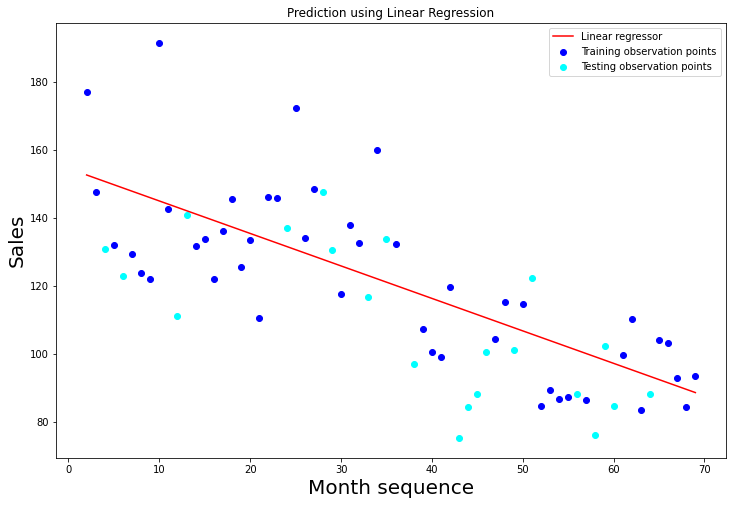

Linear Regression: [[85.72]] (Accuracy: 58%)


In [44]:
linearResult = predictLinearRegression(X_train, y_train, X_test, y_test)
reg = linearResult['regressor']
regValues['Linear'] = round(linearResult['values'][0][0])

### Polynomial Regression's result

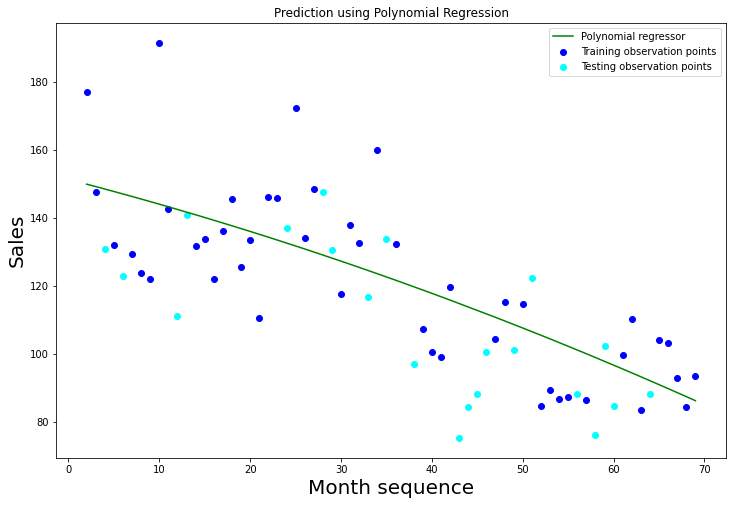

Polynomial Regression: [[82.59]] (Accuracy: 58%)


In [45]:
polynomialResult = predictPolynomialRegression(X_train, y_train, X_test, y_test)
polynomial_regressor = polynomialResult['regressor']
regValues['Polynomial'] = round(polynomialResult['values'][0][0])

### Simple Vector Regression (SVR)'s result

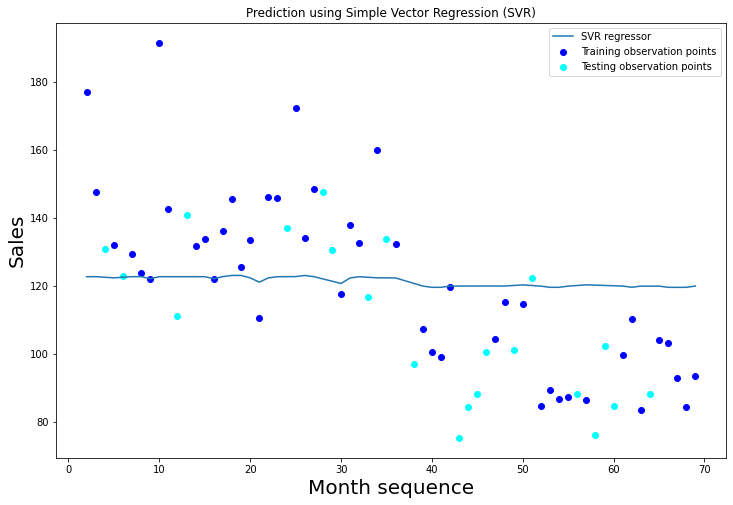

Simple Vector Regression (SVR): [121.33] (Accuracy: 9%)


In [46]:
svrResult = predictSVR(X_train, y_train, X_test, y_test)
svr_regressor = svrResult['regressor']
regValues['SVR'] = round(svrResult['values'][0])

### Voting Regressor's result

In [47]:
vRegressor = VotingRegressor(estimators=[('reg', reg), ('polynomial_regressor', polynomial_regressor), ('svr_regressor', svr_regressor)])

vRegressorRes = vRegressor.fit(X_train, y_train.ravel())

# VotingRegressor - Predict for January 2020
vRegressor_predict = vRegressor.predict([[predictFor]])
regValues['Voting Regressor'] = round(vRegressor_predict[0])
print('Voting Regressor January 2020 predicted value: ' + str(round(vRegressor_predict[0])))
regResults.loc[product] = regValues

Voting Regressor January 2020 predicted value: 98


In [48]:
regResults

,Linear,Polynomial,SVR,Voting Regressor
N02BA,86,83,121,98
